<a href="https://colab.research.google.com/github/Tayaba19/5-Google-Playstore-Analysis/blob/main/Google_Play_Store_App_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

## Loading Dataset

In [2]:
appdf = pd.read_csv('Play Store Data.csv')
appdf.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
appdf.shape

(10841, 13)

In [4]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [5]:
# Removing unneccesary special characters and replacing nan values with '0'

# Replace 'nan' with '0'
appdf['Rating'] = appdf['Rating'].astype(str)
appdf['Rating'] = appdf['Rating'].str.replace('nan', '0')

# Replace '3.0M' with '0'
appdf['Reviews'] = appdf['Reviews'].astype(str)  # Ensure 'Reviews' is also string type
appdf['Reviews'] = appdf['Reviews'].str.replace('3.0M', '0')


# Removing special characters
appdf['Installs'] = appdf['Installs'].astype(str)
appdf['Installs'] = appdf['Installs'].str.replace('+', '')
appdf['Installs'] = appdf['Installs'].str.replace(',', '')


# Replace 'Free' with '0' before converting to integer
appdf['Installs'] = appdf['Installs'].str.replace('Free', '0')

# Replace 'nan' with '0'
appdf['Type'] = appdf['Type'].astype(str)
appdf['Type'] = appdf['Type'].str.replace('nan', '0')

# Replace 'Everyone' with '0'
appdf['Price'] = appdf['Price'].astype(str)
appdf['Price'] = appdf['Price'].str.replace('Everyone', '0')


# Replace 'Everyone' with '0'
appdf['Content Rating'] = appdf['Content Rating'].astype(str)
appdf['Content Rating'] = appdf['Content Rating'].str.replace('Everyone', '0')

# Replace 'nan' with '0'
appdf['Current Ver'] = appdf['Current Ver'].astype(str)
appdf['Current Ver'] = appdf['Current Ver'].str.replace('nan', '0')
appdf['Current Ver'] = appdf['Current Ver'].str.replace('opciÃƒÂ³n de cerrar', '0')


# Replace 'nan' with '0'
appdf['Android Ver'] = appdf['Android Ver'].astype(str)
appdf['Android Ver'] = appdf['Android Ver'].str.replace('nan', '0')

appdf['Last Updated'] = appdf['Last Updated'].astype(str)
appdf['Last Updated'] = appdf['Last Updated'].str.replace('1.0.19', '0')


In [6]:
# Changing the datatype of columns [reviews, install]

# convert datatype to integer
appdf['Installs'] = appdf['Installs'].astype(int)
appdf['Rating'] = appdf['Rating'].astype(float)
appdf['Reviews'] = appdf['Reviews'].astype(int)

# Remove dollar sign and convert 'Price' to numeric
appdf['Price'] = appdf['Price'].astype(str).str.replace('$', '').astype(float)

# Convert 'Last Updated' to datetime, handling errors
appdf['Last Updated'] = pd.to_datetime(appdf['Last Updated'], errors='coerce')

In [7]:
# Extract year from last updated
appdf['Year'] = appdf['Last Updated'].dt.year
appdf['Year'] = pd.to_datetime(appdf['Year'], errors='coerce')

In [8]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
 13  Year            10840 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)


In [9]:
appdf['Year'].isnull().sum()
appdf['Year'] = appdf['Year'].fillna(0)

## Creating a Separate Genre DataFrame.
- This approach creates a new DataFrame where each row represents an app-genre combination.

In [10]:
# Explode the 'Genres' column to create separate rows for each genre
genre_df = appdf.assign(Genre=appdf['Genres'].str.split(';')).explode('Genre')

# reset index
genre_df.reset_index(drop=True, inplace=True)

In [11]:
genre_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design


In [12]:
# drop of genres column

appdf1 = genre_df.drop('Genres', axis=1)
appdf1.head(2)  ## clean dataset of app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Year,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,0,2018-01-07,1.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,0,2018-01-15,2.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design


In [13]:
reviewdf = pd.read_csv('User Reviews.csv')
reviewdf.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [14]:
reviewdf.shape

(64295, 5)

In [15]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## Finding Missing values and Treating them.

In [16]:
reviewdf.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [17]:
## Dropping rows
reviewdf.dropna(inplace=True)

In [18]:
reviewdf.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [19]:
reviewdf1 = reviewdf.copy()

In [20]:
## clean data of review
reviewdf1.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


In [21]:
appdf1.nunique()

,0
App,9660
Category,34
Rating,41
Reviews,6001
Size,462
Installs,20
Type,3
Price,92
Content Rating,7
Last Updated,1377


In [22]:
# identifying duplicate values

appdf.duplicated().sum()


483

In [23]:

# display duplicates   563 rows

appdf1[appdf1.duplicated()].head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Year,Genre
236,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,0,2018-02-26,Varies with device,4.0.3 and up,1970-01-01 00:00:00.000002018,Business
243,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,0,2018-07-31,Varies with device,Varies with device,1970-01-01 00:00:00.000002018,Business
246,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,0,2018-07-24,2.19.0.204537701,4.4 and up,1970-01-01 00:00:00.000002018,Business
263,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,0,2018-07-20,4.1.28165.0716,4.0 and up,1970-01-01 00:00:00.000002018,Business


In [24]:
appdf1 = appdf1.drop_duplicates()
appdf1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Year,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,0,2018-01-07,1.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,0,2018-01-15,2.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,0,2018-01-15,2.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Pretend Play


In [25]:
appdf1.shape

(10776, 14)

In [26]:
appdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10776 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10776 non-null  object        
 1   Category        10776 non-null  object        
 2   Rating          10776 non-null  float64       
 3   Reviews         10776 non-null  int64         
 4   Size            10776 non-null  object        
 5   Installs        10776 non-null  int64         
 6   Type            10776 non-null  object        
 7   Price           10776 non-null  float64       
 8   Content Rating  10776 non-null  object        
 9   Last Updated    10775 non-null  datetime64[ns]
 10  Current Ver     10776 non-null  object        
 11  Android Ver     10776 non-null  object        
 12  Year            10776 non-null  object        
 13  Genre           10776 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memor

In [27]:
reviewdf1.nunique()

,0
App,865
Translated_Review,27994
Sentiment,3
Sentiment_Polarity,5410
Sentiment_Subjectivity,4474


In [28]:
reviewdf1.duplicated().sum()

7735

In [29]:
reviewdf1[reviewdf1.duplicated()].head(4)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
78,10 Best Foods for You,Good,Positive,0.70,0.600000
79,10 Best Foods for You,Good,Positive,0.70,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [30]:
# Drop Duplicate Rows:
reviewdf1 = reviewdf1.drop_duplicates()


In [31]:
reviewdf1.shape

(29692, 5)

In [32]:
reviewdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


- Apps and Review has no more duplicates and missing values.

## Correlation

In [33]:
numeric_columns = appdf1.select_dtypes(include=np.number).columns

# Calculate correlation only for numeric columns
correlation_matrix = appdf1[numeric_columns].corr()

print(correlation_matrix)

            Rating   Reviews  Installs     Price
Rating    1.000000  0.078323  0.082114 -0.016448
Reviews   0.078323  1.000000  0.635451 -0.009394
Installs  0.082114  0.635451  1.000000 -0.011160
Price    -0.016448 -0.009394 -0.011160  1.000000


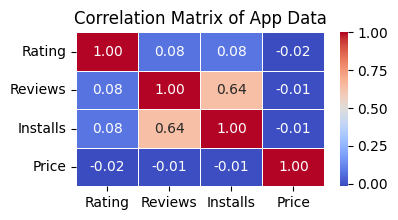

In [34]:
plt.figure(figsize=(4, 2))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of App Data')
plt.show()

In [35]:
numeric_columns1 = reviewdf1.select_dtypes(include=np.number).columns

# Calculate correlation only for numeric columns
correlation_matrix1 = reviewdf1[numeric_columns1].corr()

print(correlation_matrix1)

                        Sentiment_Polarity  Sentiment_Subjectivity
Sentiment_Polarity                1.000000                0.272284
Sentiment_Subjectivity            0.272284                1.000000


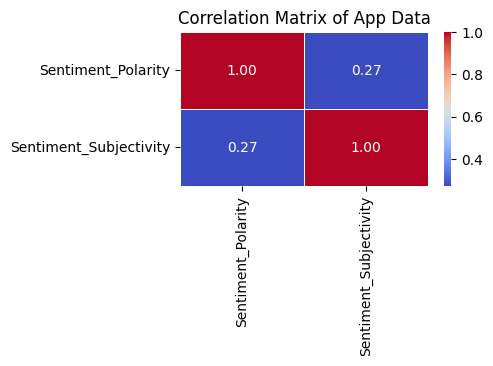

In [36]:
plt.figure(figsize=(4, 2))  # Adjust figure size as needed
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of App Data')
plt.show()

## Exploratory Data Analysis

In [37]:
appdf1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Year,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,0,2018-01-07,1.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,0,2018-01-15,2.0.0,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design


## Univariate Analysis of apps

## 1. Numerical Variables [rating, reviews, installs, price]

In [38]:
appdf1['Rating'].nunique()

41

In [39]:
appdf1['Rating'].describe()

,Rating
count,10776.000000
mean,3.618040
std,1.527559
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,19.000000


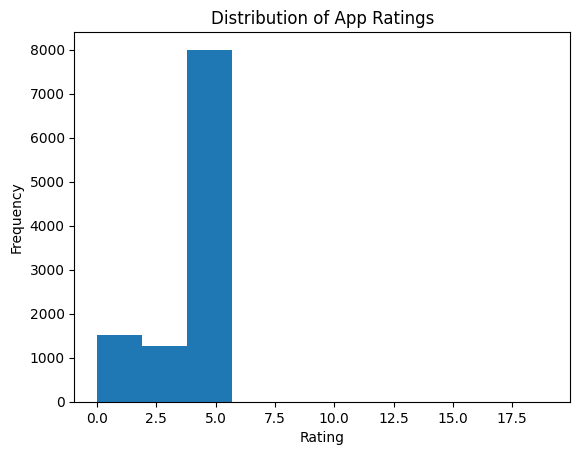

In [40]:
plt.hist(appdf1['Rating'], bins=10)  # Adjust bins as needed
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

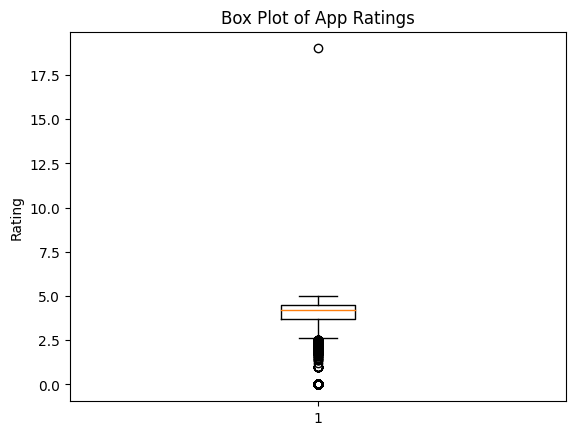

In [41]:
plt.boxplot(appdf1['Rating'])
plt.title('Box Plot of App Ratings')
plt.ylabel('Rating')
plt.show()

In [42]:
appdf1['Reviews'].nunique()

6001

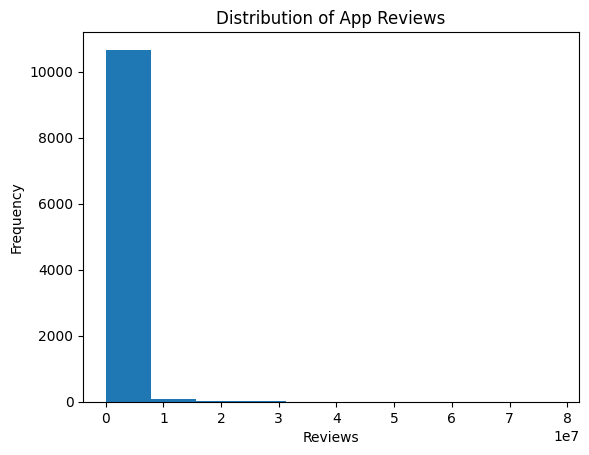

In [43]:
plt.hist(appdf1['Reviews'], bins=10)  # Adjust bins as needed
plt.title('Distribution of App Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

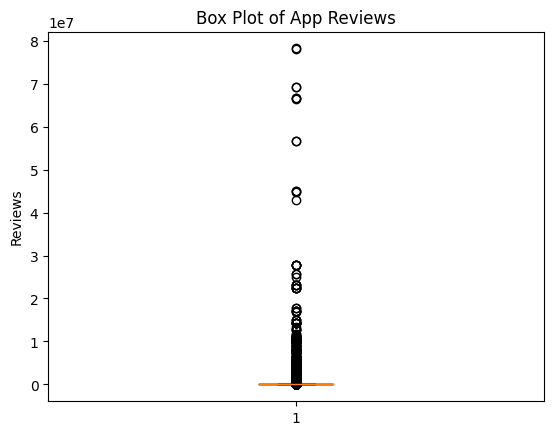

In [44]:
plt.boxplot(appdf1['Reviews'])
plt.title('Box Plot of App Reviews')
plt.ylabel('Reviews')
plt.show()

In [45]:
appdf1['Installs'].nunique()

20

In [46]:
appdf1['Installs'].describe()

,Installs
count,1.077600e+04
mean,1.391231e+07
std,7.876407e+07
min,0.000000e+00
25%,1.000000e+03
50%,1.000000e+05
75%,5.000000e+06
max,1.000000e+09


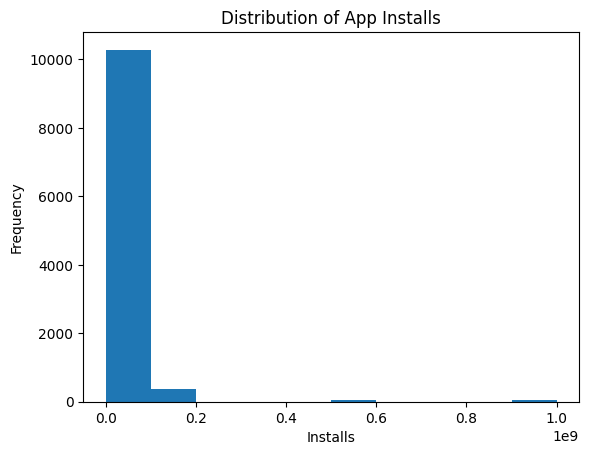

In [47]:
plt.hist(appdf1['Installs'], bins=10)  # Adjust bins as needed
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

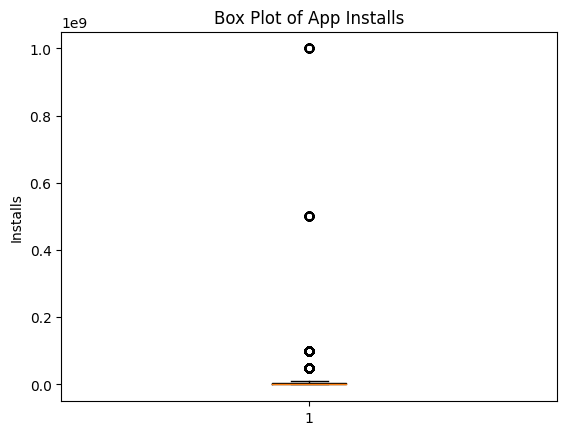

In [48]:
plt.boxplot(appdf1['Installs'])
plt.title('Box Plot of App Installs')
plt.ylabel('Installs')
plt.show()

In [49]:
appdf1['Price'].nunique()

92

In [50]:
appdf1['Price'].describe()

,Price
count,10776.000000
mean,1.011917
std,15.961487
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


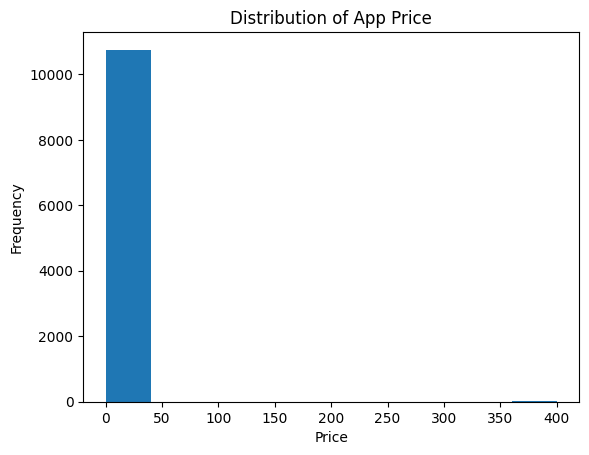

In [51]:
plt.hist(appdf1['Price'], bins=10)  # Adjust bins as needed
plt.title('Distribution of App Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

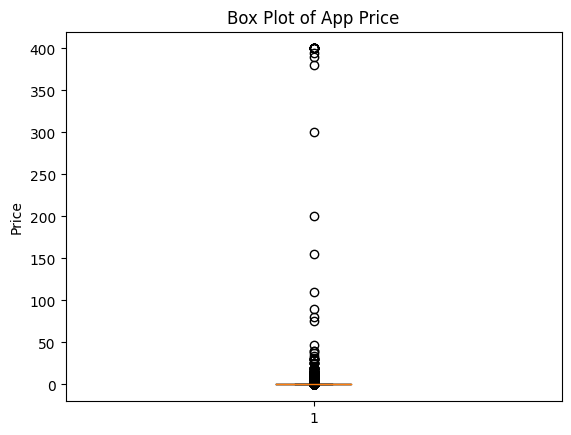

In [52]:
plt.boxplot(appdf1['Price'])
plt.title('Box Plot of App Price')
plt.ylabel('Price')
plt.show()

## 2.Categorical Variables [category, content rating, type]

In [53]:
category_counts = appdf1['Category'].value_counts()
print(category_counts)

Category
FAMILY                 2298
GAME                   1135
TOOLS                   844
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               374
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        238
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           177
EDUCATION               142
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          124
ENTERTAINMENT           121
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
PARENTING                74
ART_AND_DESIGN           72
EVENTS                   64
COMICS                   61
BEAUTY                   53
1.9                       1
Name: count, dtype: int64


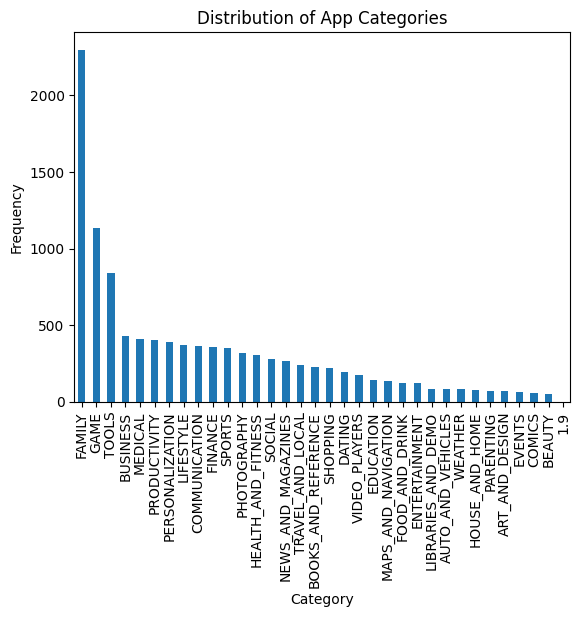

In [54]:
category_counts.plot(kind='bar')
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [55]:
appdf1['Type'].nunique()

3

In [56]:
appdf1['Type'].value_counts()

,count
Type,
Free,9941
Paid,833
0,2


In [57]:
appdf1['Type'] = appdf1['Type'].replace({'0': 'Free'})

In [58]:
type_counts = appdf1['Type'].value_counts()
type_counts

,count
Type,
Free,9943
Paid,833


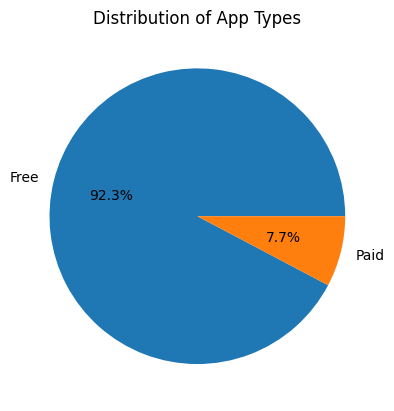

In [59]:
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of App Types')
plt.show()

In [60]:
# Replace '0' and '0 10+' with 'Everyone'
appdf1['Content Rating'] = appdf1['Content Rating'].replace({'0': 'Everyone', '0 10+': 'Everyone'})

# Replace NaN values with 'Unrated' if desired
appdf1['Content Rating'] = appdf1['Content Rating'].replace({'nan':'Unrated'})

# Verify the updated distribution
content_rating_counts = appdf1['Content Rating'].value_counts()
print(content_rating_counts)

Content Rating
Everyone           9177
Teen               1146
Mature 17+          447
Adults only 18+       3
Unrated               3
Name: count, dtype: int64


In [61]:
appdf1['Content Rating'].nunique()

5

In [62]:
appdf1['Content Rating'].value_counts()

,count
Content Rating,
Everyone,9177
Teen,1146
Mature 17+,447
Adults only 18+,3
Unrated,3


<Axes: xlabel='Content Rating'>

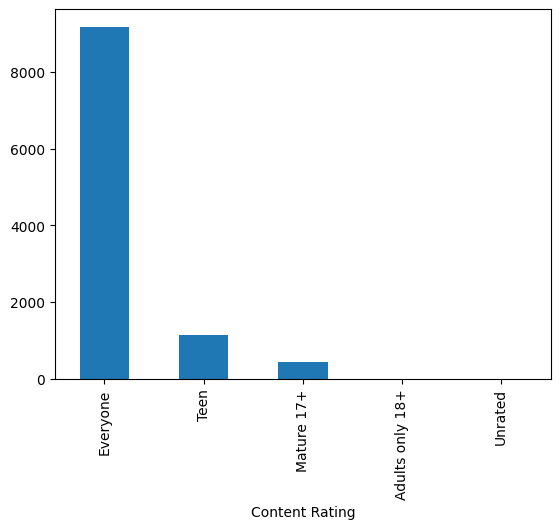

In [63]:
appdf1['Content Rating'].value_counts().plot(kind='bar')

## 3.Text Variables [App, genre]

In [64]:
appdf1['Genre'].nunique()

54

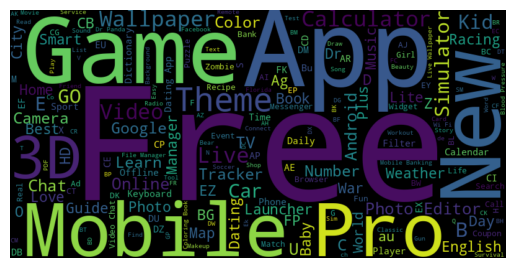

In [65]:
from wordcloud import WordCloud

text_data = ' '.join(appdf1['App'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Univariate Analysis of reviews

In [66]:
reviewdf1.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


## 1. Numerical Variables [Sentiment_polarity, sentiment_subjective]

In [67]:
reviewdf1['Sentiment_Polarity'].nunique()

5410

In [68]:
reviewdf1['Sentiment_Polarity'].describe()

,Sentiment_Polarity
count,29692.000000
mean,0.188868
std,0.355694
min,-1.000000
25%,0.000000
50%,0.157143
75%,0.422917
max,1.000000


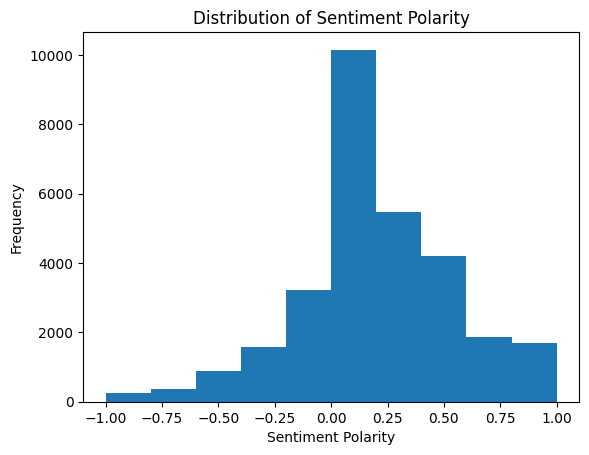

In [69]:
# histogram
plt.hist(reviewdf1['Sentiment_Polarity'], bins=10)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

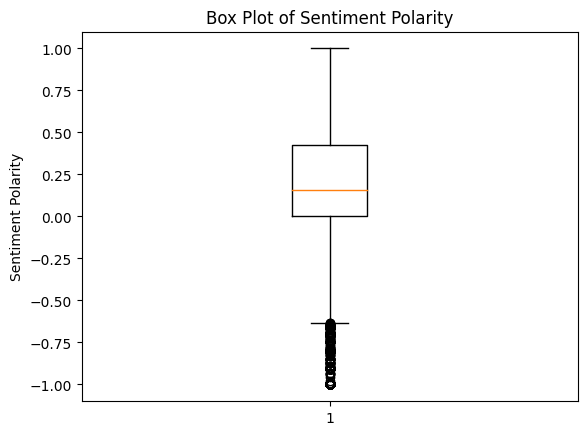

In [70]:
# box plots
plt.boxplot(reviewdf1['Sentiment_Polarity'])
plt.title('Box Plot of Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

In [71]:
reviewdf1['Sentiment_Subjectivity'].nunique()

4474

In [72]:
reviewdf1['Sentiment_Subjectivity'].describe()

,Sentiment_Subjectivity
count,29692.000000
mean,0.490930
std,0.265976
min,0.000000
25%,0.350000
50%,0.514286
75%,0.652703
max,1.000000


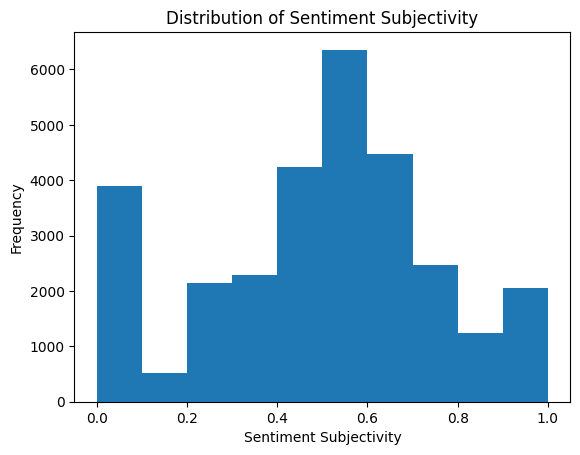

In [73]:
# Sentiment Subjectivity
plt.hist(reviewdf1['Sentiment_Subjectivity'], bins=10)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()

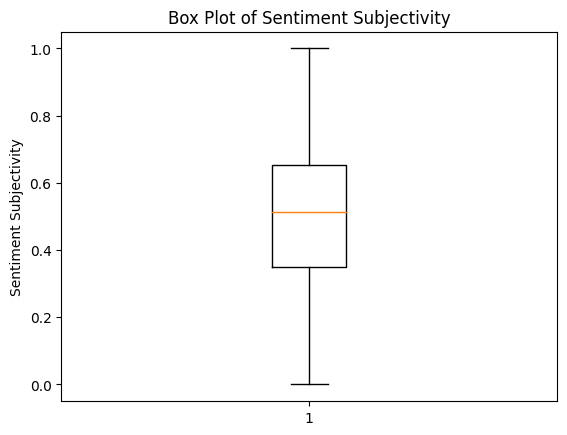

In [74]:
plt.boxplot(reviewdf1['Sentiment_Subjectivity'])
plt.title('Box Plot of Sentiment Subjectivity')
plt.ylabel('Sentiment Subjectivity')
plt.show()

## 2. Categorical Variables [Translated review]

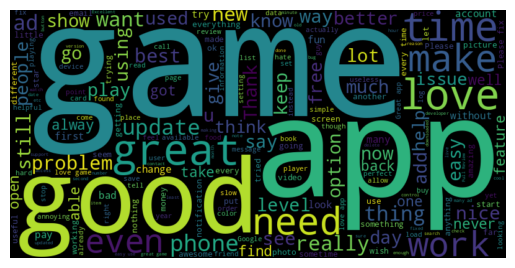

In [75]:
from wordcloud import WordCloud

text_data = ' '.join(reviewdf1['Translated_Review'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bivariate Analysis of APP

## 1. Numerical vs. Numerical

Scatter Plots:

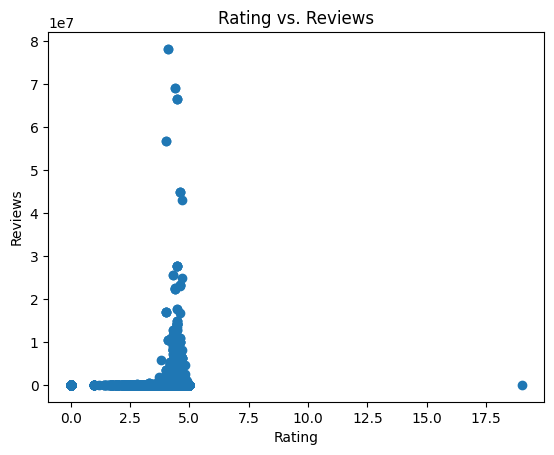

In [76]:
plt.scatter(appdf1['Rating'], appdf1['Reviews'])
plt.title('Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

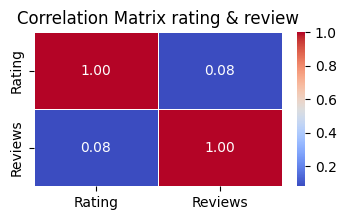

In [77]:
## Correlation:

# Calculate the correlation and store it in a DataFrame
correlation_df = appdf1[['Rating', 'Reviews']].corr()

plt.figure(figsize=(4, 2))  # Adjust figure size as needed
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix rating & review')
plt.show()


## 2. Categorical vs. Numerical

Box Plots:

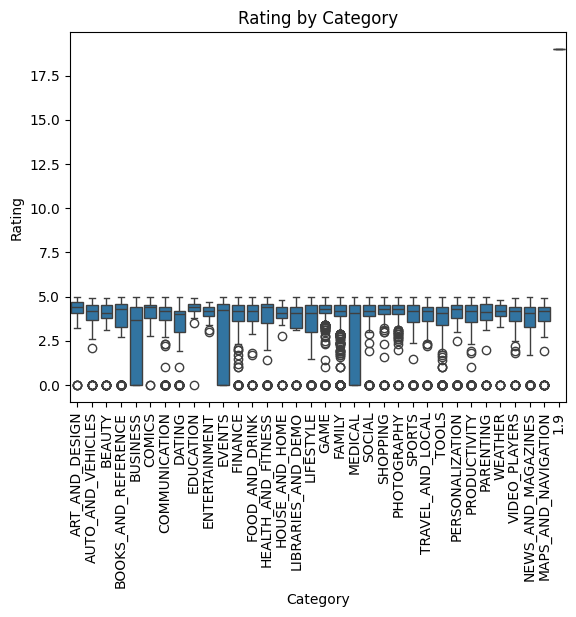

In [78]:
# Example: Rating by Category
sns.boxplot(x='Category', y='Rating', data=appdf1)
plt.title('Rating by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

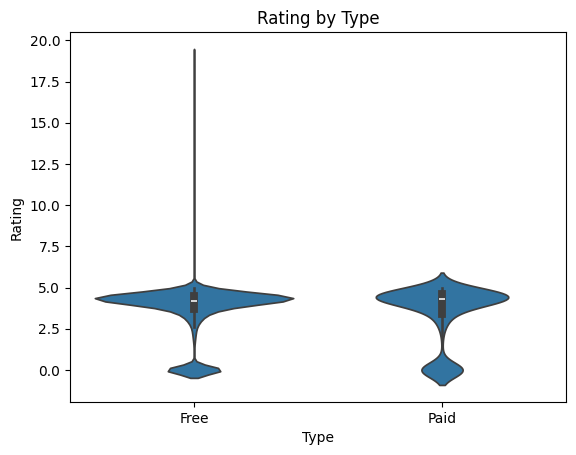

In [79]:
# Violin Plots:

# Example: Rating by Type
sns.violinplot(x='Type', y='Rating', data=appdf1)
plt.title('Rating by Type')
plt.show()

## 3. Categorical vs. Categorical

Heatmaps:

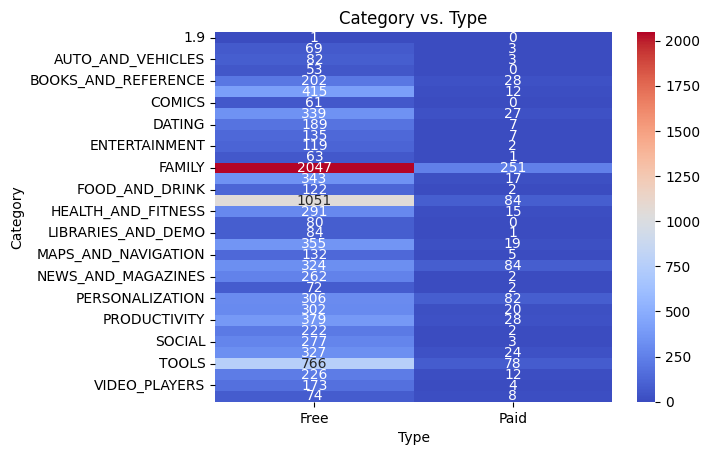

In [80]:
# Example: Category vs. Type
category_type_crosstab = pd.crosstab(appdf1['Category'], appdf1['Type'])
sns.heatmap(category_type_crosstab, annot=True, cmap='coolwarm', fmt="d")
plt.title('Category vs. Type')
plt.show()

## Bivariate Analysis of review

## 1. Numerical vs. Numerical

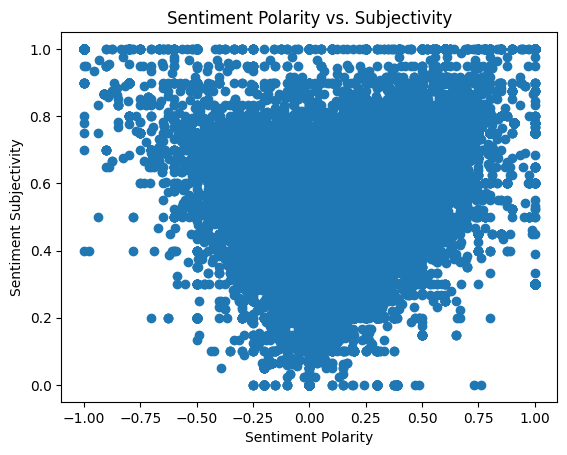

In [81]:
# Scatter plot
plt.scatter(reviewdf1['Sentiment_Polarity'], reviewdf1['Sentiment_Subjectivity'])
plt.title('Sentiment Polarity vs. Subjectivity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.show()

In [82]:
# Correlation
correlation = reviewdf1['Sentiment_Polarity'].corr(reviewdf1['Sentiment_Subjectivity'])
print(f"Correlation: {correlation}")

Correlation: 0.2722837423046024


## 2. Categorical vs. Numerical (Translated_Review vs. Sentiment)

In [83]:
# Create a new 'Sentiment' column
reviewdf1['Sentiment'] = pd.cut(reviewdf1['Sentiment_Polarity'],
                                 bins=[-1, -0.1, 0.1, 1],
                                 labels=['Negative', 'Neutral', 'Positive'])

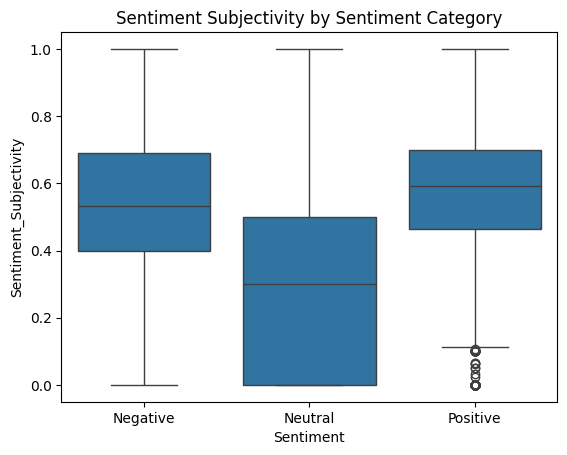

In [84]:
# boxplot
sns.boxplot(x='Sentiment', y='Sentiment_Subjectivity', data=reviewdf1)
plt.title('Sentiment Subjectivity by Sentiment Category')
plt.show()

## Multi variate analysis

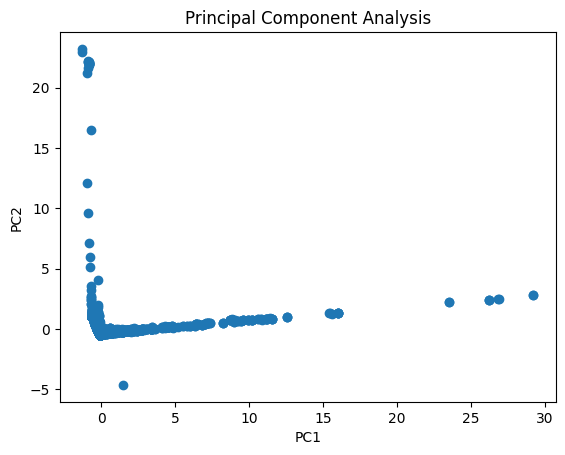

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = ['Rating', 'Reviews', 'Installs', 'Price']
X = appdf1[numerical_features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the principal components (e.g., scatter plot)
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Feature Engineering

#### 1. Numerical Feature Interactions:

In [86]:
# reviews per install
appdf1['Reviews_Per_Install'] = appdf1['Reviews'] / appdf1['Installs']

In [87]:
# Price per Review
appdf1['Price_per_Review'] = appdf1['Price'] / appdf1['Reviews']

## 2. Calculate app age:

In [88]:
current_date = pd.Timestamp.now()
appdf1['App_Age'] = (current_date - appdf1['Last Updated']).dt.days


## Merging App & Review datasets

In [89]:
merged_df = pd.merge(appdf1, reviewdf1, on='App')
merged_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,...,Android Ver,Year,Genre,Reviews_Per_Install,Price_per_Review,App_Age,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,2018-01-15,...,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design,0.001934,0.0,2480.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,2018-01-15,...,4.0.3 and up,1970-01-01 00:00:00.000002018,Art & Design,0.001934,0.0,2480.0,It bad >:(,Negative,-0.725,0.833333


## Calculate Revenue of paid apps

In [90]:
# filter paid apps
paid_apps = merged_df[merged_df['Type'] == 'Paid']
paid_apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,...,Android Ver,Year,Genre,Reviews_Per_Install,Price_per_Review,App_Age,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
15598,Farming Simulator 18,GAME,4.5,18125,15M,100000,Paid,4.99,Everyone,2018-07-09,...,4.4 and up,1970-01-01 00:00:00.000002018,Simulation,0.18125,0.000275,2305.0,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
15599,Farming Simulator 18,GAME,4.5,18125,15M,100000,Paid,4.99,Everyone,2018-07-09,...,4.4 and up,1970-01-01 00:00:00.000002018,Simulation,0.18125,0.000275,2305.0,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000


In [91]:
# calculate revenue
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

<ipython-input-91-95c75854e90c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']


In [92]:
# total Revenue
total_revenue = paid_apps['Revenue'].sum()
total_revenue

311582630.0

#### Task 1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.


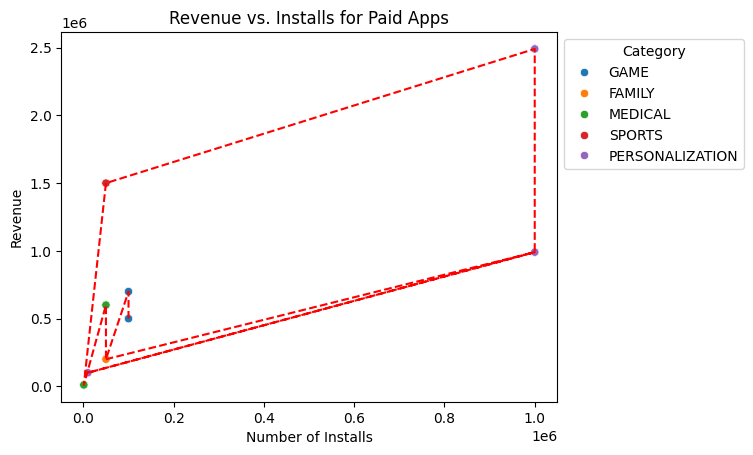

In [93]:

# Filter for paid apps and create the scatter plot
sns.scatterplot(x='Installs', y='Revenue',hue='Category', data=paid_apps)

# Add a trendline
plt.plot(paid_apps['Installs'], paid_apps['Revenue'], color='red', linestyle='--')  # Adjust color and style as needed

# Customize the plot
plt.title('Revenue vs. Installs for Paid Apps')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

# Display the plot
plt.show()

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Task 2. Create an interactive choropleth map using Plotly to visualize global installs by country. Apply filters to show data for only the top 5 app categories and highlight countries where the number of installs exceeds 1 million and App category should not start with character “A” , “C” , “G” and “S” . This Graph should not work between 12 PM tp 6 PM


In [101]:
import plotly.express as px
import pandas as pd
import datetime

In [109]:
# Filter top 5 app categories
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(5).index

# Filter countries with installs > 1 million and allowed app categories
# Replaced 'df' with 'filtered_df' to fix the NameError
filtered_df = filtered_df[(filtered_df['Installs'] > 1000000) & (filtered_df['Category'].isin(top_categories)) &
                 ~(filtered_df['Category'].str.startswith(('A', 'C', 'G', 'S')))]

In [113]:
# Assuming your DataFrame has a column named 'App' with country names
# and you want to color the map based on the 'Installs' column
fig = px.choropleth(filtered_df,
                    locations="App",  # Changed 'Country' to 'App'
                    locationmode="country names",
                    color="Installs",
                    hover_name="App",
                    hover_data=["Installs", "Category"],
                    color_continuous_scale="Viridis",
                    title="Global Installs by Country (Top 5 Categories)")

# ... (rest of your code remains the same)


In [118]:
import datetime
current_time = datetime.datetime.now()
if current_time.hour >= 12 and current_time.hour <= 18:
    fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        annotations=[
            dict(
                text="Map is currently unavailable. Please try again later.",
                xref="paper",
                yref="paper",
                x=0.5,
                y=0.5,
                showarrow=False
            )
        ] # Fixed: Aligned closing bracket with the opening bracket of annotations list
    ) # Fixed: Aligned closing parenthesis with the opening parenthesis of update_layout

In [119]:
fig.show()


## Task 3- Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this chart should work between 4 Pm to 8Pm



In [96]:
import pandas as pd
import plotly.express as px

# Assuming you have the 'merged_df' DataFrame
filtered_df = merged_df[
    (merged_df['Content Rating'] == 'Teen') &
    (merged_df['App'].str.startswith('E')) &
    (merged_df['Installs'] > 10000)
]

# Convert 'Last Updated' to datetime and extract month and year
filtered_df['Last Updated'] = pd.to_datetime(filtered_df['Last Updated'])
filtered_df['Month'] = filtered_df['Last Updated'].dt.to_period('M')

# Group by month and category, sum installs
installs_over_time = filtered_df.groupby(['Month', 'Category'])['Installs'].sum().reset_index()

# Calculate month-over-month growth rate
installs_over_time['Growth_Rate'] = installs_over_time.groupby('Category')['Installs'].pct_change()

# Highlight periods of significant growth
installs_over_time['Significant_Growth'] = installs_over_time['Growth_Rate'] > 0.2

In [97]:
## Creating the Time Series Line Chart:

# Convert 'Month' column to string before plotting
installs_over_time['Month'] = installs_over_time['Month'].astype(str)

fig = px.line(
    installs_over_time,
    x="Month",
    y="Installs",
    color="Category",
    title="Trend of Total Installs Over Time",
    labels={"Installs": "Total Installs", "Month": "Month"},
)

# Add shaded areas for significant growth
fig.add_traces(
    px.area(
        installs_over_time[installs_over_time['Significant_Growth']],
        x="Month",
        y="Installs",
        color="Category",
    ).data
)

# Show the chart
fig.show()

code filters the DataFrame for specific conditions:
1 Content Rating is 'Teen'

2 App name starts with 'E'

3 Installs are greater than 10,000.

If no apps meet all of these conditions, the filtered DataFrame will be empty, resulting in no data to plot.

If the resultant DataFrame has only one point to plot, the line chart would not be visible.

## Replace the filter to include apps with names starting with 'F' to test if there is enough data to show on the plot

In [98]:
import pandas as pd
import plotly.express as px

# Assuming you have the 'merged_df' DataFrame
filtered_df = merged_df[
    (merged_df['Content Rating'] == 'Teen') &
    (merged_df['App'].str.startswith('F')) &
    (merged_df['Installs'] > 10000)
]

# Convert 'Last Updated' to datetime and extract month and year
filtered_df['Last Updated'] = pd.to_datetime(filtered_df['Last Updated'])
filtered_df['Month'] = filtered_df['Last Updated'].dt.to_period('M')

# Group by month and category, sum installs
installs_over_time = filtered_df.groupby(['Month', 'Category'])['Installs'].sum().reset_index()

# Calculate month-over-month growth rate
installs_over_time['Growth_Rate'] = installs_over_time.groupby('Category')['Installs'].pct_change()

# Highlight periods of significant growth
installs_over_time['Significant_Growth'] = installs_over_time['Growth_Rate'] > 0.2

In [99]:
## Creating the Time Series Line Chart:

# Convert 'Month' column to string before plotting
installs_over_time['Month'] = installs_over_time['Month'].astype(str)

fig = px.line(
    installs_over_time,
    x="Month",
    y="Installs",
    color="Category",
    title="Trend of Total Installs Over Time",
    labels={"Installs": "Total Installs", "Month": "Month"},
)

# Add shaded areas for significant growth
fig.add_traces(
    px.area(
        installs_over_time[installs_over_time['Significant_Growth']],
        x="Month",
        y="Installs",
        color="Category",
    ).data
)

# Show the chart
fig.show()

In [120]:
import plotly.graph_objects as go

In [125]:
# Assuming 'merged_df' is the DataFrame you intended to use
filtered_df = merged_df[(merged_df['Content Rating'] == 'Teen') & (merged_df['App'].str.startswith('E')) & (merged_df['Installs'] > 10000)]

In [127]:
# Replace 'App Category' with the actual column name from your DataFrame
# Assuming the actual column name is 'Category'
filtered_df['Month-over-Month Growth'] = filtered_df.groupby('Category')['Installs'].pct_change() * 100

In [132]:
import plotly.graph_objects as go
import pandas as pd  # Import pandas for to_datetime

fig = go.Figure()

# Replace 'App Category' with the actual column name from your DataFrame
# Assuming the actual column name is 'Category'
for category in filtered_df['Category'].unique():  # Changed 'App Category' to 'Category'
    # Create category_df after adding the 'Date' column to filtered_df
    filtered_df['Date'] = pd.to_datetime(filtered_df['Last Updated']) # Convert to datetime object if needed
    category_df = filtered_df[filtered_df['Category'] == category]  # Changed 'App Category' to 'Category'

    # Create a line trace for the category
    # Shade areas of significant growth
    fig.add_trace(go.Scatter(x=category_df['Date'], y=category_df['Installs'],
                            fill='tonexty', fillcolor='rgba(152, 0, 0, 0.2)',
                            mode='none',
                            showlegend=False))

# Customize the chart (optional)
fig.update_layout(
    title='Total Installs Over Time by App Category',
    xaxis_title='Date',
    yaxis_title='Total Installs',
    xaxis_rangeslider_visible=False
)

fig.show()

## Key Insights

#### 1 Data Cleaning and Preprocessing:

- Handling Missing Values: addressed missing values by replacing them with 0. However, consider exploring other imputation techniques like using the mean or median for numerical features, or mode for categorical features. This might provide more accurate insights.
- Data Transformation: converted data types and removed special characters. Consider further transformations like scaling numerical features (e.g., using StandardScaler) or applying logarithmic transformations for skewed distributions. This can improve model performance.

#### 2 Feature Engineering:

- App Age: calculated app age, which is a valuable feature. Consider exploring other time-based features like days since last update, or creating categorical features based on app age ranges (e.g., new, mature, old).
- Text Features: performed basic text analysis using word clouds. Consider exploring more advanced techniques like sentiment analysis on app descriptions or user reviews. This can provide insights into user perceptions and preferences.
- Category Interactions: Explore interactions between categories and other features. For example, create features like "Category_x_Type" to capture the combined effect of category and app type.

#### 3 Analysis and Visualization:

- Interactive Visualizations: Consider using Plotly or other interactive visualization libraries to create more engaging and informative charts. This allows users to explore the data in more detail.
- Multivariate Analysis: performed PCA. Consider exploring other dimensionality reduction techniques like t-SNE or UMAP. This can help visualize relationships between multiple features.
- Statistical Modeling: Consider building statistical models  to predict app ratings, installs, or revenue. This can provide insights into factors that drive app success.

## Business Insights:
-	Category Performance: Analyze the performance of different app categories based on metrics like installs, ratings, and revenue. Identify top-performing categories and potential areas for improvement.
- User Sentiment: Analyze user reviews to understand sentiment towards different app categories or features. This can help identify areas for improvement in app design or functionality.
- Pricing Strategies: Analyze the relationship between price and installs for paid apps. Identify optimal pricing strategies for different app categories.
- Marketing and Promotion: Based on your analysis, provide recommendations for marketing and promotion strategies to increase app visibility and downloads.